# Aula de decomposição de Time Series

**O que significa decompor uma Time Series?**

Como séries temporais podem conter diversos padrões, geralmente é útil quebrar a série em diversos componentes, em que cada uma representa uma característica da série.

Decomposições clássicas fazem decomposição em três padrões: tendência, sazonalidade e ciclos, e ruídos.

**Por que decompomos Time Series?**

A decomposição auxilia a análise exploratória de dados, uma vez que é mais fácil entender as características (componentes) do que a série completa.
E também, realizar decomposição pode melhorar o desempenho de seus modelos. **MELHORAR**

## Séries Estacionárias vs Não estacionárias

Explicar como diferenciá-las e porque é importante diferenciá-las

## Transformação de time series

Explicar e exemplificiar transformações de time series e porque elas são importantes.

## Módulos Python para decomposição de Time Series

Em python, o principal módulo que implementa funções de tratamento de time series é a `statsmodels.tsa` ([documentação](https://www.statsmodels.org/stable/tsa.html)).

## Como se decompõe uma série temporal?

### Decomposição clássica

Como mencionado acima, a série é decomposta nos componentes: tendência ($T_t$), sazonalidade ($S_t$) e ruído ($R_t$).

A decomposição pode ser realizada de forma:
- Aditiva: $y_t = S_t + T_t + R_t$
- Multiplicativa: $y_t = S_t * T_t * R_t$

A forma aditiva é mais apropriada quando a magnitude das flutuações sazonalidade, ou variações ao redor da tendência, não variam com o tempo.

Já quando a variação do padrão sazonal ao redor da tendência aparenta ser proporcional ao nível da série, então uma decomposição multiplicativa é mais adequada.

A decomposição clássica é o método original de decomposição nos componentes apresentados. Este método inicia pelo calculo do componente de tendência, seguido da sazonalidade e o ruído é calculado pela subtração ou divisão, dependendo se a decomposição for aditiva ou multiplicativa.

#### Tendência

Calcula-se uma estimativa para $T_t$, $\hat{T}_t$, com uma $2 \times m-MA$. **POR QUE 2 x m-MA??**

Série sem tendência: $y_t - \hat{T}_t$

#### Sazonalidade

Calcula-se a sazonalidade para cada (sazon kkkj) padrão sazonal da série tomando a média da série sem tendência. Por exemplo, se a série for mensal, é calculada a média da série para cada mês. Esse componente é ajustado, para garantir que tenha soma zero. E finalmente os valore são replicados gerando a série $\hat{S}_t$

#### Ruído

O ruído é simplismente $\hat{R}_t = y_t - \hat{T}_t - \hat{S}_t$ na decomposição aditiva e $\hat{R}_t = \frac{y_t}{\hat{T}_t\hat{S}_t}$ para a multiplicativa




## Exemplo de decomposição clássica

Série histórica de emissão de CO2.

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import co2

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [9]:
data = co2.load(True).data
data = data.resample('M').mean().ffill()

In [15]:
data

,co2
1958-03-31,316.100000
1958-04-30,317.200000
1958-05-31,317.433333
1958-06-30,317.433333
1958-07-31,315.625000
...,...
2001-08-31,369.425000
2001-09-30,367.880000
2001-10-31,368.050000
2001-11-30,369.375000


In [16]:
res = seasonal_decompose(data, model="additive")

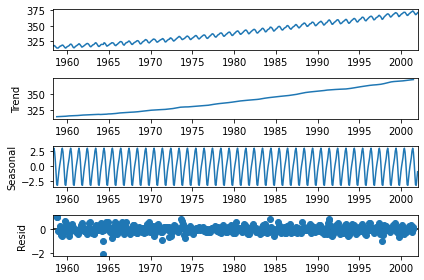

In [17]:
res.plot()
plt.show()

### Seasonal and Trend decomposition using LOESS - STL

STL é considerado pela nossa principal referência [1] o modelo mais robusto e versátil para decomposição de séries temporais, pois consegue lidar melhor com vários tipos de sazonalidade e é possível ter mais controle sobre a decomposição. LOESS é um método para estimar relações não lineares

In [ ]:
from statsmodels.tsa.seasonal import STL

## Decomposição de séries não estacionárias

- ENSEMBLE EMPIRICAL MODE DECOMPOSITION: A NOISE-ASSISTED DATA ANALYSIS METHOD
- A COMPLETE ENSEMBLE EMPIRICAL MODE DECOMPOSITION WITH ADAPTIVE NOISE

### EEMD

### CEEMDAN


Exemplificar com trabalho do Renan Avila
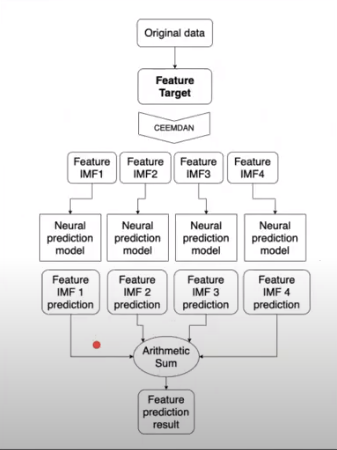

## Referências

[1] - Forecasting: Principles and Practice 3ª edição